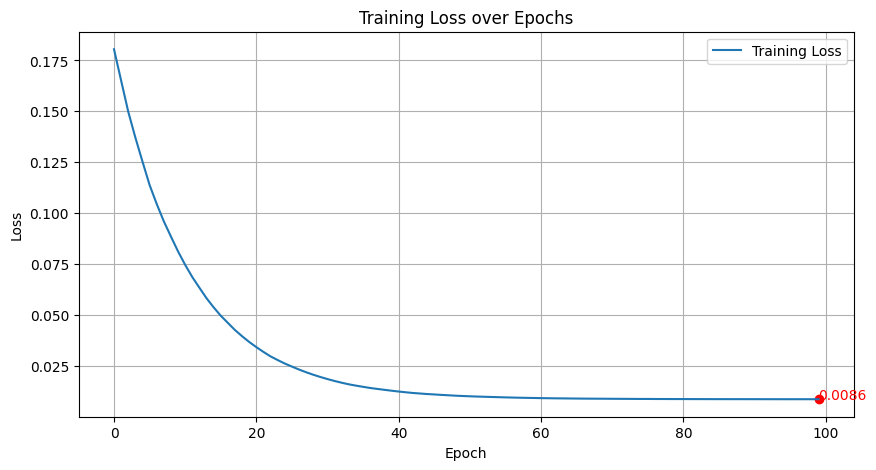

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Generate synthetic data for demonstration
np.random.seed(42)
X = np.linspace(-1, 1, 200)
y = 0.5 * X + np.random.normal(0, 0.1, X.shape)

# Define a simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Lists to store losses and iterations
losses = []
iterations = []

# Custom training loop to update plot during training
def train_model(epochs):
    for epoch in range(epochs):
        history = model.fit(X, y, epochs=1, verbose=0)
        losses.append(history.history['loss'][0])
        iterations.append(epoch)
        
        # Update plot dynamically
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(iterations, losses, label='Training Loss')
        plt.scatter(iterations[-1], losses[-1], color='red')  # Highlight the latest point
        # Annotate directly above the last point
        annotation_x_pos = iterations[-1]
        annotation_y_pos = losses[-1] + (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # Slightly above the last point, adjusted by 2% of the y-axis range

        plt.text(annotation_x_pos, annotation_y_pos, f'{losses[-1]:.4f}',
                 color='red', ha='center')  # Annotate the latest loss value
        plt.legend()
        plt.grid(True)
        plt.show()

# Run the training function for a number of epochs
train_model(100)
